1.Problem Satement : A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

1.1 Business Objective 

Goal:

To maintain consistent quality and size of cutlets produced across both units.
Ensuring that the cutlet diameters meet the standard specifications to avoid customer dissatisfaction.
___________________________________________________________________________________________________________________________________________________________

1.2 Constraints 

Limited Sample Size:
The inferences are drawn based on a limited sample, which may not capture the variability of the entire population.

Time Sensitivity:
Quick decisions are required to maintain production standards, so analysis should be timely.
    
Accuracy in Measurement:
Measurement errors or inconsistencies in data collection may affect the validity of results.

_________________________________________________________________________________________________________________________________________________________

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
data=pd.read_csv("Cutlets.csv")
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [18]:
#Now will check shape of the data
data.shape

(51, 2)

In [20]:
#Data Dictionary 
#Unit A - Continous
#Unit B - Continous

In [22]:
#Data Preprocessing
#first we will check the datatype
data.dtypes 

Unit A    float64
Unit B    float64
dtype: object

In [24]:
data.columns

Index(['Unit A', 'Unit B'], dtype='object')

In [26]:
#Check the null values
data.isna().sum() 
#from ouput we can see there are 16 null values in both the columns ,so we will apply mean imputation to fill that null values

Unit A    16
Unit B    16
dtype: int64

In [72]:
df=data.head(35)

In [74]:
#Check the null values
df.isna().sum() 
#from ouput we can see that there are zero null values

Unit A    0
Unit B    0
dtype: int64

In [78]:
#Now will check shape of the data
df.shape

(35, 2)

In [80]:
df.describe() #by this we came to know min ,max,std,mean 25%,75%,50%

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


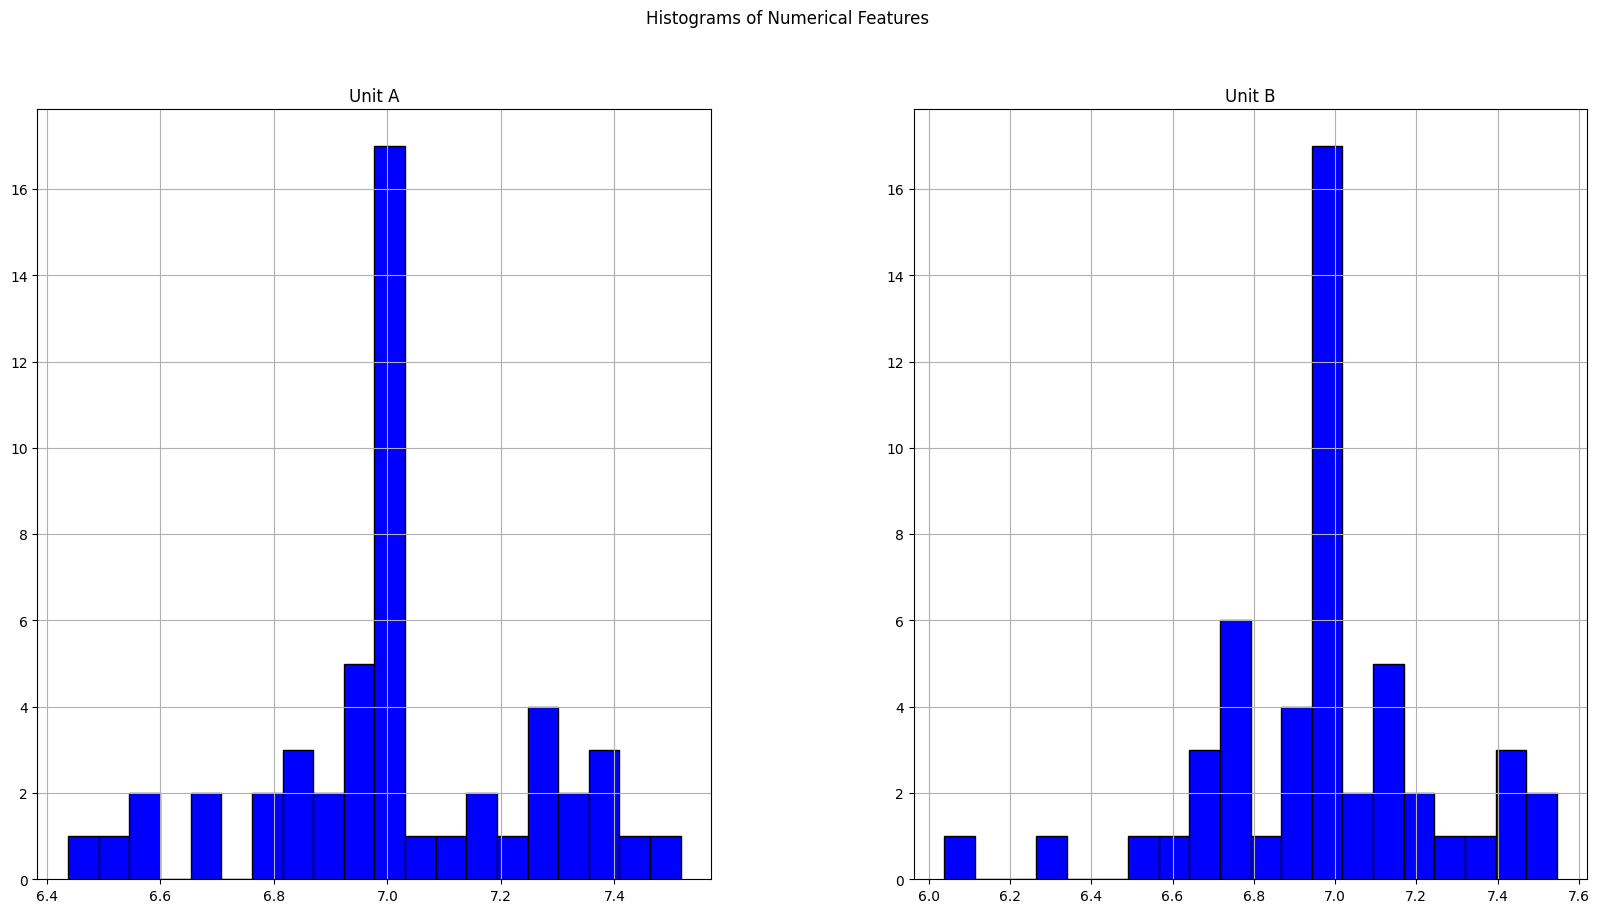

In [82]:
#Univariate Analysis
import matplotlib.pyplot as plt
data.hist(figsize=(20, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

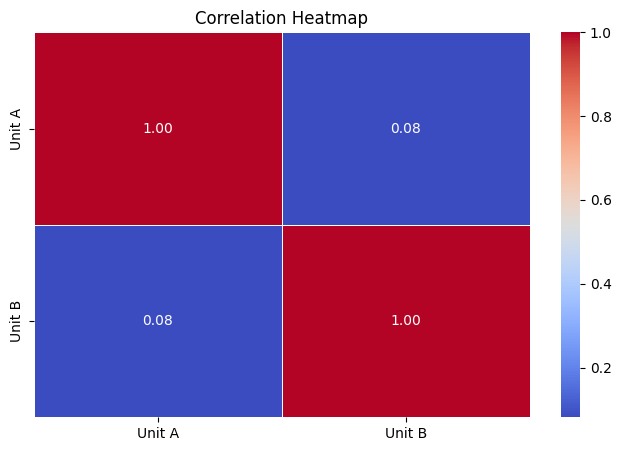

In [84]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[['Unit A','Unit B']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
#From this graph we understand Unit A and Unit B are weakly corelated

In [58]:
import scipy.stats as stats

In [86]:
# Assumption 1: Normality Test
# =================================================================================================================================
# Shapiro-Wilk test for Unit A and Unit B
shapiro_unitA = stats.shapiro(df['Unit A'])
shapiro_unitB = stats.shapiro(df['Unit B'])

print("Shapiro-Wilk Test Results:")
print(f"Unit A: Statistic={shapiro_unitA.statistic}, p-value={shapiro_unitA.pvalue}")
print(f"Unit B: Statistic={shapiro_unitB.statistic}, p-value={shapiro_unitB.pvalue}")


Shapiro-Wilk Test Results:
Unit A: Statistic=0.9649456489968531, p-value=0.31997821996861
Unit B: Statistic=0.9727301795873082, p-value=0.5225029843840996


In [88]:
# ============================
# Assumption 2: Variance Test
# ============================
# Levene's test for equality of variances
levene_test = stats.levene(df['Unit A'], df['Unit B'])

print("\nLevene’s Test Results:")
print(f"Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")


Levene’s Test Results:
Statistic=0.6650897638632386, p-value=0.417616221250256


In [90]:
# =====================================
# Hypothesis Testing: Two-Sample t-test
# =====================================
# Perform independent two-sample t-test
t_test_result = stats.ttest_ind(df['Unit A'], df['Unit B'], equal_var=True)

print("\nTwo-Sample t-test Results:")
print(f"t-statistic={t_test_result.statistic}, p-value={t_test_result.pvalue}")


Two-Sample t-test Results:
t-statistic=0.7228688704678063, p-value=0.47223947245995


In [92]:
# ============================
# Final Inference
# ============================
alpha = 0.05
if t_test_result.pvalue <= alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in the diameters.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in the diameters.")



Conclusion: Fail to reject the null hypothesis. There is no significant difference in the diameters.
